In [1]:
import numpy as np
import pandas as pd
import copy
from scipy.stats import t,norm
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
sns.set_style('darkgrid')

In [4]:
kospi=pdr.DataReader('^KOSPI',data_source='stooq',start='2016',end='2021')
spx=pdr.DataReader('^SPX',data_source='stooq',start='2016',end='2021')
ftse=pdr.DataReader('^UKX',data_source='stooq',start='2016',end='2021')
nkx=pdr.DataReader('^NKX',data_source='stooq',start='2016',end='2021')
shc=pdr.DataReader('^SHC',data_source='stooq',start='2016',end='2021')

In [8]:
len(kospi),len(spx),len(ftse),len(nkx),len(shc)

(1227, 1259, 1265, 1221, 1218)

In [4]:
def add_percent_change(df):
    change=[]

    for i in range(len(df)-1):
        yesterday_close=df['Close'].iloc[i+1]
        today_close=df['Close'].iloc[i]    
        change.append((today_close-yesterday_close)/yesterday_close*100)

    return change

tmp=add_percent_change(kospi)
kospi=kospi[:-1]
kospi['Change']=tmp

tmp=add_percent_change(spx)
spx=spx[:-1]
spx['Change']=tmp

tmp=add_percent_change(ftse)
ftse=ftse[:-1]
ftse['Change']=tmp

tmp=add_percent_change(nkx)
nkx=nkx[:-1]
nkx['Change']=tmp

kospi.tail()


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2016-01-11,1897.18,1907.43,1892.69,1894.84,328768000,-1.187931
2016-01-08,1889.42,1918.25,1883.82,1917.62,430204000,0.697883
2016-01-07,1915.71,1926.41,1901.24,1904.33,393041984,-1.095859
2016-01-06,1934.25,1934.25,1911.61,1925.43,594611968,-0.264176
2016-01-05,1911.93,1937.57,1911.93,1930.53,446548000,0.613417


In [69]:
## 5 year performance

kospi_perf=str(np.round((kospi['Close'].iloc[0]-kospi['Close'].iloc[-1])/kospi['Close'].iloc[-1]*100,2))+'%'
spx_perf=str(np.round((spx['Close'].iloc[0]-spx['Close'].iloc[-1])/spx['Close'].iloc[-1]*100,2))+'%'
ftse_perf=str(np.round((ftse['Close'].iloc[0]-ftse['Close'].iloc[-1])/ftse['Close'].iloc[-1]*100,2))+'%'
nkx_perf=str(np.round((nkx['Close'].iloc[0]-nkx['Close'].iloc[-1])/nkx['Close'].iloc[-1]*100,2))+'%'

pd.DataFrame([kospi_perf,spx_perf,ftse_perf,nkx_perf],
index=['KOSPI','S&P 500','FTSE 250','NIKKEI 225'],columns=['5 year Performance']).T


,KOSPI,S&P 500,FTSE 250,NIKKEI 225
5 year Performance,48.84%,86.25%,19.08%,49.36%


In [5]:
kospi_std=kospi.Change.std(ddof=0)
spx_std=spx.Change.std(ddof=0)
ftse_std=ftse.Change.std(ddof=0)
nkx_std=nkx.Change.std(ddof=0)

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

Text(-3, 0.7, 'standard deviation :\n1.2913')

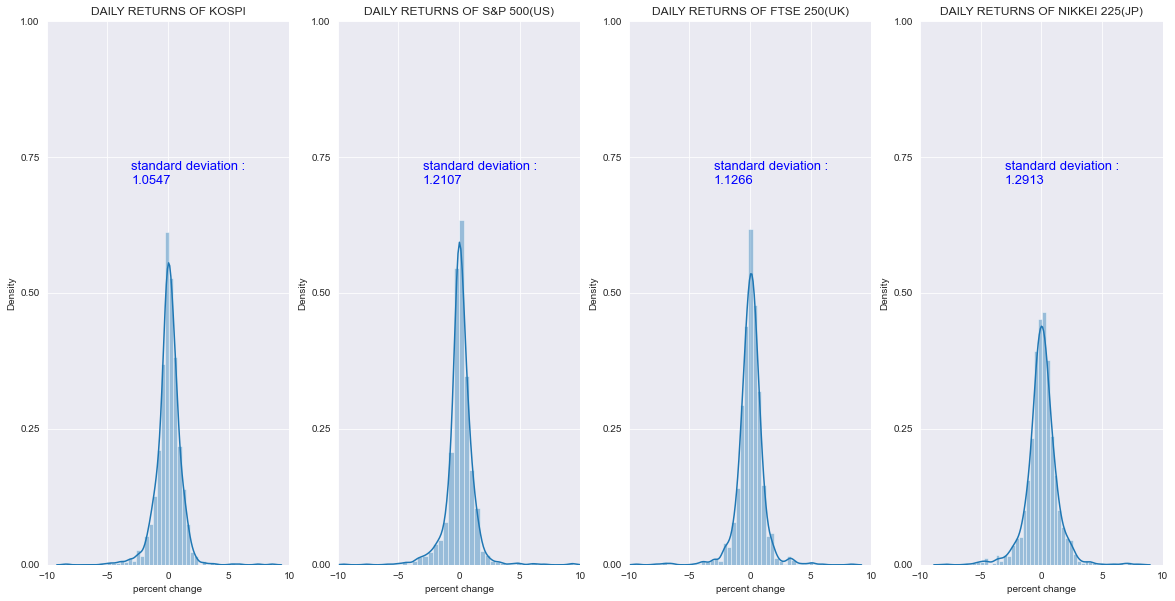

In [6]:
fig,ax=plt.subplots(1,4,figsize=(20,10))

plt.sca(ax[0])
sns.distplot(kospi['Change'],bins=50)
plt.title('DAILY RETURNS OF KOSPI')
plt.xlabel('percent change')
plt.xticks(np.linspace(-10,10,5))
plt.xlim([-10,10])
plt.yticks(np.linspace(0,1,5))
plt.text(-3,.70,'standard deviation :\n'+str(np.round(kospi_std,4)),fontsize=13,color='b')

plt.sca(ax[1])
sns.distplot(spx['Change'],bins=50)
plt.title('DAILY RETURNS OF S&P 500(US)')
plt.xlabel('percent change')
plt.xticks(np.linspace(-10,10,5))
plt.xlim([-10,10])
plt.yticks(np.linspace(0,1,5))
plt.text(-3,.70,'standard deviation :\n'+str(np.round(spx_std,4)),fontsize=13,color='b')

plt.sca(ax[2])
sns.distplot(ftse['Change'],bins=50)
plt.title('DAILY RETURNS OF FTSE 250(UK)')
plt.xlabel('percent change')
plt.xticks(np.linspace(-10,10,5))
plt.xlim([-10,10])
plt.yticks(np.linspace(0,1,5))
plt.text(-3,.70,'standard deviation :\n'+str(np.round(ftse_std,4)),fontsize=13,color='b')

plt.sca(ax[3])
sns.distplot(nkx['Change'],bins=50)
plt.title('DAILY RETURNS OF NIKKEI 225(JP)')
plt.xlabel('percent change')
plt.xticks(np.linspace(-10,10,5))
plt.xlim([-10,10])
plt.yticks(np.linspace(0,1,5))
plt.text(-3,.70,'standard deviation :\n'+str(np.round(nkx_std,4)),fontsize=13,color='b')

## correlation matrix

<AxesSubplot:>

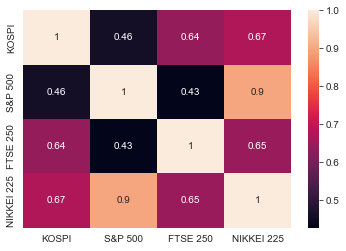

In [7]:
df=pd.DataFrame([kospi.Close,spx.Close,ftse.Close,nkx.Close],\
    index=['KOSPI','S&P 500','FTSE 250','NIKKEI 225']).T
sns.heatmap(df.corr(),annot=True)

In [8]:
df

,KOSPI,S&P 500,FTSE 250,NIKKEI 225
Date,,,,
2016-01-05,1930.53,2016.71,17205.03,18374.00
2016-01-06,1925.43,1990.26,17058.98,18191.32
2016-01-07,1904.33,1943.09,16792.22,17767.34
2016-01-08,1917.62,1922.03,16732.66,17697.96
2016-01-11,1894.84,1923.67,16658.32,NaN
...,...,...,...,...
2020-12-25,NaN,NaN,NaN,26656.61
2020-12-28,2808.60,3735.36,NaN,26854.03
2020-12-29,2820.51,3727.04,20897.59,27568.15


## chi square test

In [9]:
kospi_average_returns=kospi['Change'].mean()
spx_average_returns=spx['Change'].mean()
ftse_average_returns=ftse['Change'].mean()
nkx_average_returns=nkx['Change'].mean()

In [10]:
kospi_positive=kospi['Close'][kospi['Change']>=0].count()
kospi_negative=kospi['Close'][kospi['Change']<0].count()
spx_positive=spx['Close'][spx['Change']>=0].count()
spx_negative=spx['Close'][spx['Change']<0].count()
ftse_positive=ftse['Close'][ftse['Change']>=0].count()
ftse_negative=ftse['Close'][ftse['Change']<0].count()
nkx_positive=nkx['Close'][nkx['Change']>=0].count()
nkx_negative=nkx['Close'][nkx['Change']<0].count()

positive_total=kospi_positive+spx_positive+ftse_positive+nkx_positive
negative_total=kospi_negative+spx_negative+ftse_negative+nkx_negative
total_sum=int(positive_total+negative_total+.5)

In [11]:
observations=pd.DataFrame(
    data=[
        [kospi_positive,spx_positive,ftse_positive,nkx_positive,positive_total,np.round(positive_total/total_sum,4)],
        [kospi_negative,spx_negative,ftse_negative,nkx_negative,negative_total,np.round(negative_total/total_sum,4)],
        [len(kospi),len(spx),len(ftse),len(nkx),total_sum,1]
        ],
        columns=['KOSPI','S&P 500','FTSE 250','NIKKEI 225','Total','Ratio'],
        index=['positive return','negative return','sum'])
observations

,KOSPI,S&P 500,FTSE 250,NIKKEI 225,Total,Ratio
positive return,679,702,671,643,2695,0.5425
negative return,547,556,593,577,2273,0.4575
sum,1226,1258,1264,1220,4968,1.0000


In [12]:
expected_value=[]

for column in ['KOSPI','S&P 500','FTSE 250','NIKKEI 225']:
    expected_frequency=[int(observations[column].loc['sum']*observations['Ratio'].loc['positive return']+.5),
    int(observations[column].loc['sum']*observations['Ratio'].loc['negative return']+.5)]
    expected_value.append(np.array(expected_frequency))
expected_value=pd.DataFrame(np.array(expected_value).T,columns=['KOSPI','S&P 500','FTSE 250','NIKKEI 225'])

In [13]:
expected_value

,KOSPI,S&P 500,FTSE 250,NIKKEI 225
0,665,682,686,662
1,561,576,578,558


In [14]:
var=[]
for i,column in enumerate(list(observations.columns[:-2])):
    for j,index in enumerate(list(observations.index[:2])):
        k=((observations.iloc[j][i]-expected_value.iloc[j][i])**2)/expected_value.iloc[j][i]
        print(k)
        var.append(k)

chi_statistic=pd.Series(var).sum()

0.29473684210526313
0.3493761140819964
0.5865102639296188
0.6944444444444444
0.32798833819241985
0.3892733564013841
0.5453172205438066
0.6469534050179212


In [15]:
chi_statistic

3.8345999847168546

In [16]:
doff=(len(observations.columns[:-2])-1)*(len(observations.index[:2])-1)
crit=chi2.ppf(q=.95,df=doff)

In [17]:
1-chi2.cdf(chi_statistic,df=doff)

0.27988714217991584

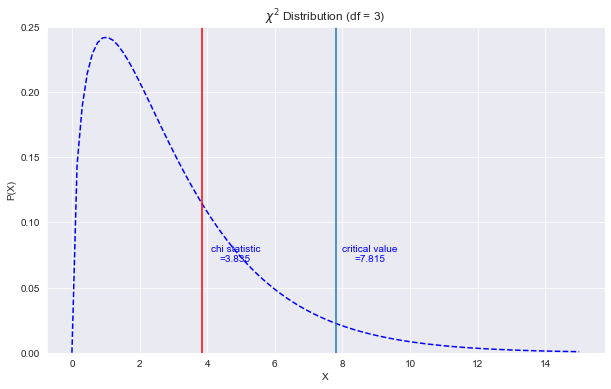

In [18]:
x = np.linspace(0, 15, 100)
y = chi2(doff).pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b--')
plt.axvline(crit)
plt.axvline(chi_statistic,color='r')
plt.text(crit+1, .07, 'critical value\n=' + str(round(crit, 3)), 
         horizontalalignment='center', color='b')
plt.text(chi_statistic+1, .07, 'chi statistic\n=' + str(round(chi_statistic, 3)), 
         horizontalalignment='center', color='b')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.ylim([0,.25])
plt.title(r'$\chi^2$ Distribution (df = 3)')
plt.show()

In [19]:
kospi_above_average=kospi['Close'][kospi_average_returns+.5*kospi_std<kospi['Change']].count()
kospi_near_average=\
    kospi['Close'][(kospi_average_returns-.5*kospi_std<kospi['Change'])&(kospi['Change']<kospi_average_returns+.5*kospi_std)].count()
kospi_below_average=kospi['Close'][kospi_average_returns-.5*kospi_std>=kospi['Change']].count()

spx_above_average=spx['Close'][spx_average_returns+.5*spx_std<spx['Change']].count()
spx_near_average=\
    spx['Close'][(spx_average_returns-.5*spx_std<spx['Change'])&(spx['Change']<spx_average_returns+.5*spx_std)].count()
spx_below_average=spx['Close'][spx_average_returns-.5*spx_std>=spx['Change']].count()

ftse_above_average=ftse['Close'][ftse_average_returns+.5*ftse_std<ftse['Change']].count()
ftse_near_average=\
    ftse['Close'][(ftse_average_returns-.5*ftse_std<ftse['Change'])&(ftse['Change']<ftse_average_returns+.5*ftse_std)].count()
ftse_below_average=ftse['Close'][ftse_average_returns-.5*ftse_std>=ftse['Change']].count()

nkx_above_average=nkx['Close'][nkx_average_returns+.5*nkx_std<nkx['Change']].count()
nkx_near_average=\
    nkx['Close'][(nkx_average_returns-.5*nkx_std<nkx['Change'])&(nkx['Change']<nkx_average_returns+.5*nkx_std)].count()
nkx_below_average=nkx['Close'][nkx_average_returns-.5*nkx_std>=nkx['Change']].count()

In [20]:
near_average_total=kospi_near_average+spx_near_average+ftse_near_average+nkx_near_average

kospi_sum=int(kospi_above_average+kospi_near_average+kospi_below_average+.5)
spx_sum=int(spx_above_average+spx_near_average+spx_below_average+.5)
ftse_sum=int(ftse_above_average+ftse_near_average+ftse_below_average+.5)
nkx_sum=int(nkx_above_average+nkx_near_average+nkx_below_average+.5)
total_sum=kospi_sum+spx_sum+ftse_sum+nkx_sum

above_average_total=kospi_above_average+spx_above_average+ftse_above_average+nkx_above_average
near_average_total=kospi_near_average+spx_near_average+ftse_near_average+nkx_near_average
below_average_total=kospi_below_average+spx_below_average+ftse_below_average+nkx_below_average

above_average_ratio=np.round(above_average_total/total_sum,4)
near_average_ratio=np.round(near_average_total/total_sum,4)
below_average_ratio=np.round(below_average_total/total_sum,4)

observations2=pd.DataFrame(
    data=[
        [kospi_above_average,spx_above_average,ftse_above_average,nkx_above_average,above_average_total,above_average_ratio],
        [kospi_near_average,spx_near_average,ftse_near_average,nkx_near_average,near_average_total,near_average_ratio],
        [kospi_below_average,spx_below_average,ftse_below_average,nkx_below_average,below_average_total,below_average_ratio],
        [kospi_sum,spx_sum,ftse_sum,nkx_sum,total_sum,1]
        ],
        columns=['KOSPI','S&P 500','FTSE 250','NIKKEI 225','Total','Ratio'],
        index=['above 0.5std','+0.5std ~ -0.5std','below 0.5std','sum'])
observations2

,KOSPI,S&P 500,FTSE 250,NIKKEI 225,Total,Ratio
above 0.5std,308,258,278,288,1132,0.2279
+0.5std ~ -0.5std,661,783,722,665,2831,0.5698
below 0.5std,257,217,264,267,1005,0.2023
sum,1226,1258,1264,1220,4968,1.0000


In [21]:
expected_value=[]

for column in ['KOSPI','S&P 500','FTSE 250','NIKKEI 225']:
    expected_frequency=[int(observations2[column].loc['sum']*observations2['Ratio'].loc['above 0.5std']+.5),
    int(observations2[column].loc['sum']*observations2['Ratio'].loc['+0.5std ~ -0.5std']+.5),
    int(observations2[column].loc['sum']*observations2['Ratio'].loc['below 0.5std']+.5)]
    expected_value.append(np.array(expected_frequency))
expected_value=pd.DataFrame(np.array(expected_value).T,columns=['KOSPI','S&P 500','FTSE 250','NIKKEI 225'])
expected_value

,KOSPI,S&P 500,FTSE 250,NIKKEI 225
0,279,287,288,278
1,699,717,720,695
2,248,254,256,247


In [22]:
var=[]
for i,column in enumerate(list(observations2.columns[:-2])):
    for j,index in enumerate(list(observations2.index[:2])):
        k=((observations2.iloc[j][i]-expected_value.iloc[j][i])**2)/expected_value.iloc[j][i]
        var.append(k)

chi_statistic=pd.Series(var).sum()

In [23]:
chi_statistic

16.093226648282815

In [24]:
doff=(len(observations2.columns[:-2])-1)*(len(observations2.index[:-1])-1)
crit=chi2.ppf(q=.95,df=doff)

In [25]:
crit

12.591587243743977

In [26]:
1-chi2.cdf(chi_statistic,df=doff)

0.013262234023999397

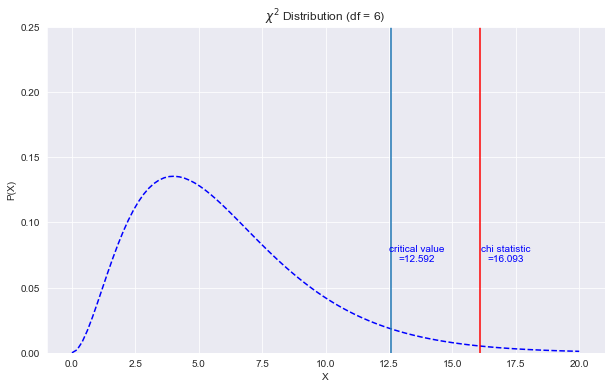

In [27]:
x = np.linspace(0, 20, 100)
y = chi2(doff).pdf(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b--')
plt.axvline(crit)
plt.axvline(chi_statistic,color='r')
plt.text(crit+1, .07, 'critical value\n=' + str(round(crit, 3)), 
         horizontalalignment='center', color='b')
plt.text(chi_statistic+1, .07, 'chi statistic\n=' + str(round(chi_statistic, 3)), 
         horizontalalignment='center', color='b')
plt.xlabel('X')
plt.ylabel('P(X)')
plt.ylim([0,.25])
plt.title(r'$\chi^2$ Distribution (df = 6)')
plt.show()

## runs test

In [28]:
## expected number of returns

def r_bar(n1,n2):
    return 2*n1*n2/(n1+n2)+1

def Sr(n1,n2):
    return np.sqrt(2*n1*n2*(2*n1*n2-n1-n2)/(((n1+n2)**2)*(n1+n2-1)))

## z-test
def Z(observed_runs,positive_returns,negative_returns):
    return (observed_runs-r_bar(positive_returns,negative_returns))/Sr(positive_returns,negative_returns)

def runs(series):
    runs=0
    for i in range(1,len(series)):
        if(series[i]>=0 and series[i-1]<0) | (series[i]<0 and series[i-1]>=0):
            runs+=1
    return runs+1

In [56]:
kospiZ=Z(runs(kospi['Change']),kospi_positive,kospi_negative)
spxZ=Z(runs(spx['Change']),spx_positive,spx_negative)
ftseZ=Z(runs(ftse['Change']),ftse_positive,ftse_negative)
nkxZ=Z(runs(nkx['Change']),nkx_positive,nkx_negative)

kospiP=1-norm.cdf(kospiZ)
spxP=1-norm.cdf(spxZ)
ftseP=1-norm.cdf(ftseZ)
nkxP=1-norm.cdf(nkxZ)

In [57]:
norm.ppf(.95)

1.6448536269514722

In [58]:
pd.DataFrame([[kospiZ,spxZ,ftseZ,nkxZ],
[kospiP,spxP,ftseP,nkxP]],
columns=['KOSPI','S&P 500','FTSE 250','NIKKEI 225'],
index=['Z','p value'])

,KOSPI,S&P 500,FTSE 250,NIKKEI 225
Z,0.699894,2.600174,-1.841263,0.562178
p value,0.241997,0.004659,0.967208,0.286997
